In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from numpy.random import rand

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [16]:
df = pd.read_csv('../../data/training.csv') 

In [6]:
%matplotlib notebook
import sys
sys.path.insert(1, '../../src/')

In [7]:
import cleaning as cl
import new_features as nf
%load_ext autoreload
%autoreload 2

In [490]:
nf.add_features(df)

In [491]:
#SMALL
a = df[df["Size"]=="COMPACT"].index
for x in a:
    df.iat[x, 16] = "SMALL"
    
b = df[df["Size"]=="SPORTS"].index
for x in b:
    df.iat[x, 16] = "SMALL"
    
#MEDIUM    
c = df[df["Size"]=="CROSSOVER"].index
for x in c:
    df.iat[x, 16] = "MEDIUM"
    
d = df[df["Size"]=="SPECIALTY"].index
for x in d:
    df.iat[x, 16] = "MEDIUM"
    
e = df[df["Size"]=="SPECIALTY"].index
for x in e:
    df.iat[x, 16] = "MEDIUM"
    
e = df[df["Size"]=="SMALL SUV"].index
for x in e:
    df.iat[x, 16] = "MEDIUM"
    
i = df[df["Size"]=="MEDIUM SUV"].index
for x in i:
    df.iat[x, 16] = "MEDIUM"
    
#LARGE
f = df[df["Size"]=="SMALL TRUCK"].index
for x in f:
    df.iat[x, 16] = "LARGE"
    
g = df[df["Size"]=="VAN"].index
for x in g:
    df.iat[x, 16] = "LARGE"
    
h = df[df["Size"]=="LARGE SUV"].index
for x in h:
    df.iat[x, 16] = "LARGE"
    
l = df[df["Size"]=="LARGE TRUCK"].index
for x in l:
    df.iat[x, 16] = "LARGE"

In [17]:
cl.cleaning(df)

In [493]:
df["Size"].value_counts()

MEDIUM        33821
LARGE         14596
SMALL          6048
MEDIUM SUV        2
SMALL SUV         2
Name: Size, dtype: int64

In [459]:
df.columns

Index(['IsBadBuy', 'VehicleAge', 'Make', 'Model', 'Color', 'Transmission',
       'WheelTypeID', 'VehOdo', 'Nationality', 'Size',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VNST',
       'VehBCost', 'WarrantyCost', 'TrimLevel', 'BodyStyle'],
      dtype='object')

In [13]:
df.isnull().sum()

IsBadBuy                             0
VehicleAge                           0
Make                                 0
Model                                0
Color                                0
Transmission                         0
WheelTypeID                          0
VehOdo                               0
Nationality                          0
Size                                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNST                                 0
VehBCost                             0
WarrantyCost                         0
TrimLevel                            0
BodyStyle                            0
dtype: int64

Elimination of outliers and missing values during data understanding

In [249]:
X = df[["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice",
        "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice",
        "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice", "VehBCost", "WarrantyCost"]]

In [7]:
#8 MMRs
A = df[["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice",
        "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice",
        "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"]]
#print(A.head())

In [8]:
#4 MMRs (Acquisition)
B = df[["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice",
        "MMRAcquisitonRetailCleanPrice"]]
#print(B.head())

In [9]:
#2 MMRs (Acquisition - Current)
C = df[["MMRAcquisitionAuctionAveragePrice", "MMRCurrentRetailCleanPrice"]]
#print(C.head())

In [263]:
#MMRAcquisitionAuctionAveragePrice - VehBCost
D = df[["MMRAcquisitionAuctionAveragePrice","VehBCost"]]
#print(D.head())

In [327]:
#MMRAcquisitionAuctionAveragePrice - WarrantyCost
E = df[["MMRAcquisitionAuctionAveragePrice", "WarrantyCost"]]
#print(E.head())

In [282]:
#VehBCost - WarrantyCost
F = df[["VehBCost", "WarrantyCost"]]
#print(F.head())

In [18]:
#MMRAcquisitionAuctionAveragePrice - VehBCost - WarrantyCost
G = df[["MMRAcquisitionAuctionAveragePrice", "VehBCost", "WarrantyCost"]]
#print(G.head())

In [520]:
#MMRAcquisitionAuctionAveragePrice - VehBCost - WarrantyCost
H = df[["MMRAcquisitionAuctionAveragePrice", "VehBCost", "WarrantyCost", "VehOdo"]]

# K- means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Clustering Preprocessing - Normalization

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
scaler = StandardScaler()

In [251]:
scaler.fit(X.values) #A
X = scaler.transform(X.values)

In [17]:
scaler.fit(A.values) #A
A = scaler.transform(A.values)

In [18]:
scaler.fit(B.values) #B
B = scaler.transform(B.values)

In [19]:
scaler.fit(C.values) #C
C = scaler.transform(C.values)

In [264]:
scaler.fit(D.values) #D
D = scaler.transform(D.values)

In [328]:
scaler.fit(E.values) #E
E = scaler.transform(E.values)

In [283]:
scaler.fit(F.values) #F
F = scaler.transform(F.values)

In [19]:
scaler.fit(G.values) #G
G = scaler.transform(G.values)

In [524]:
scaler.fit(H.values) #H
H = scaler.transform(H.values)

# Tutti i valori numerici

In [252]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

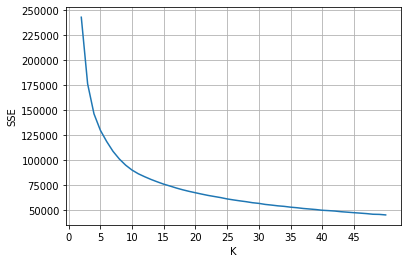

In [254]:
plt.figure(figsize=(6,4))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [258]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 118919.41003238322
Silhouette 0.24509953172978083


<ul>
    <li> K=6 - Sil=0.245 - SSE=118919
    <li> K=5 - Sil=0.268 - SSE=130237
    <li> K=4 - Sil=0.275 - SSE=146590
    <li> K=3 - Sil=0.334 - SSE=176519
</ul>

# 8 MMRs - A

In [40]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(A)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

<IPython.core.display.Javascript object>


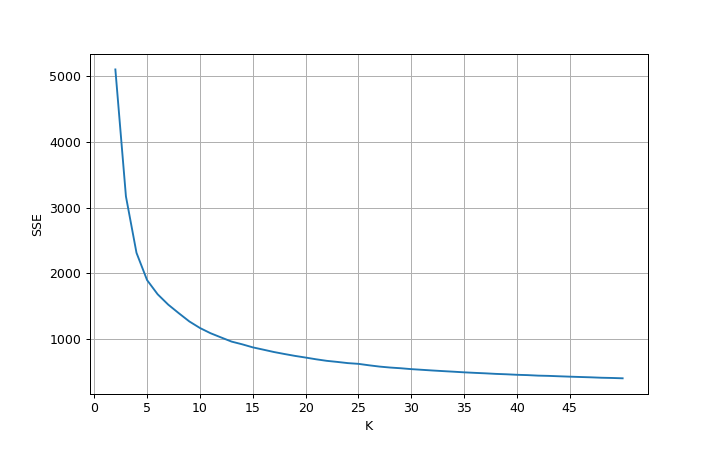

In [46]:
plt.figure(figsize=(8,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

<p>Dal plot selezioniamo K = 6.</p>
<p>Vediamo la silhouette.</p>

In [59]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(A)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(A, kmeans.labels_))

SSE 100804.91244641507
Silhouette 0.4236715184959889


<ul>
    <li> K=6 - Sil=0.299 - SSE=...
    <li> K=5 - Sil=0.338 - SSE=...
    <li> K=4 - Sil=0.379 - SSE=...
    <li> K=3 - Sil=0.423 - SSE=100804
    <li> K=2 - Sil=0.507 - SSE=162191
</ul>
<p>We choose K=2</p>

### Run K-means

In [70]:
kmeans = KMeans(n_clusters=2, n_init=500, max_iter=100)
kmeans.fit(A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
#Labels of each point
kmeans.labels_[:5]

array([1, 0, 1, 0, 0])

In [72]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([26360, 28109], dtype=int64))

In [73]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 26360, 1: 28109}

In [74]:
#Centers
kmeans.cluster_centers_

array([[-0.8333726 , -0.81961183, -0.80791485, -0.80348701, -0.82643487,
        -0.82012998, -0.81952437, -0.81734719],
       [ 0.78088672,  0.7679926 ,  0.7570323 ,  0.75288333,  0.77438593,
         0.76847813,  0.76791066,  0.76587059]])

In [75]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

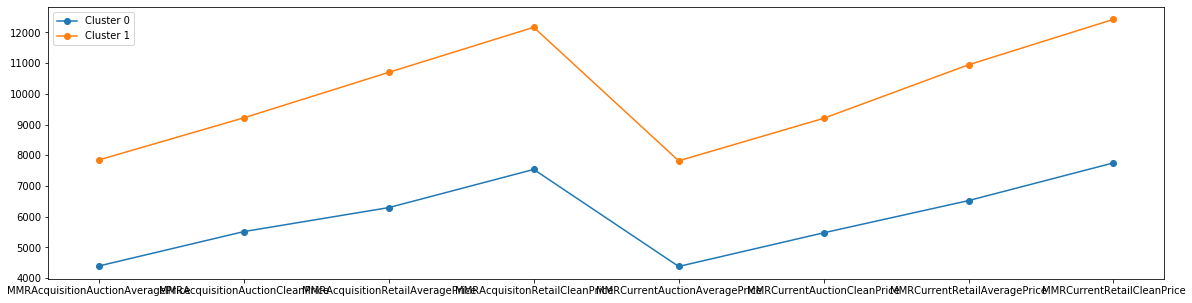

In [85]:
#Visualization of clusters centers by means of parallel coordinates
A = df[["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice",
        "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice",
        "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"]]

plt.figure(figsize=(20, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(A.columns)), A.columns)
plt.legend()
plt.show()

### Search in the clusters

In [86]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [88]:
mydict

{0: array([    1,     3,     4, ..., 54465, 54467, 54468], dtype=int64),
 1: array([    0,     2,     5, ..., 54462, 54464, 54466], dtype=int64)}

In [111]:
#df.iloc[mydict[0]]["Color"].value_counts()

In [110]:
#df.iloc[mydict[1]]["Color"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - nothing
    <li> Make - nothing
    <li> Size - nothing - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> Color - nothing
</ul>

# 4 MMRs (Acquisition) - B 

In [116]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(B)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

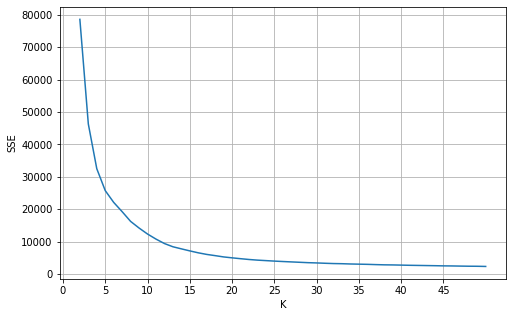

In [117]:
plt.figure(figsize=(8,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

<p>Dal plot selezioniamo K = 5.</p>
<p>Vediamo la silhouette.</p>

In [122]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
kmeans.fit(B)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(B, kmeans.labels_))

SSE 78579.33816187648
Silhouette 0.5207864228401382


<ul>
    <li> K=5 - Sil=0.377 - SSE=25762
    <li> K=4 - Sil=0.411 - SSE=32517
    <li> K=3 - Sil=0.452 - SSE=46317
    <li> K=2 - Sil=0.520 - SSE=78579
</ul>
<p>We choose K=2</p>

### Run K-means

In [123]:
kmeans = KMeans(n_clusters=2, n_init=500, max_iter=100)
kmeans.fit(B)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [124]:
#Labels of each point
kmeans.labels_[:5]

array([0, 1, 0, 1, 1])

In [125]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([27830, 26639], dtype=int64))

In [126]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 27830, 1: 26639}

In [127]:
#Centers
kmeans.cluster_centers_

array([[ 0.79258418,  0.78111849,  0.7789911 ,  0.77625594],
       [-0.82808058, -0.81610139, -0.81387871, -0.81102106]])

In [128]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

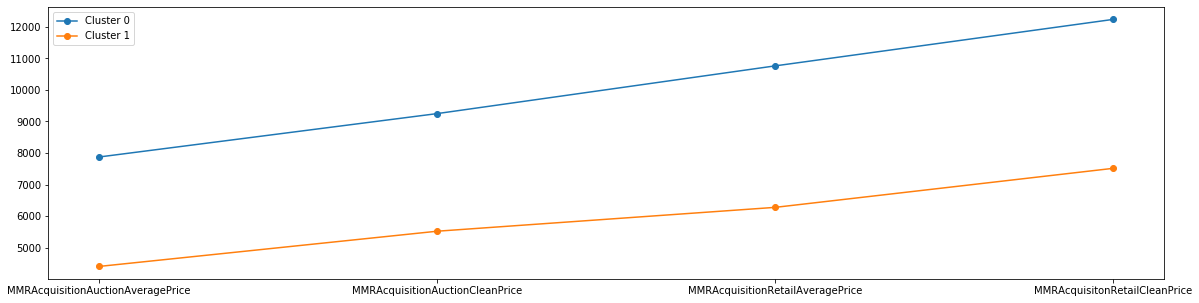

In [129]:
#Visualization of clusters centers by means of parallel coordinates
B = df[["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice",
        "MMRAcquisitonRetailCleanPrice"]]

plt.figure(figsize=(20, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(B.columns)), B.columns)
plt.legend()
plt.show()

### Search in the clusters

In [130]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [131]:
mydict

{0: array([    0,     2,     5, ..., 54462, 54464, 54466], dtype=int64),
 1: array([    1,     3,     4, ..., 54465, 54467, 54468], dtype=int64)}

In [150]:
#df.iloc[mydict[0]]["Color"].value_counts()

In [151]:
#df.iloc[mydict[1]]["Color"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - nothing
    <li> Make - nothing
    <li> Size - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> Color - nothing
</ul>

# 2 MMRs (MMRAcquisitionAuctionAveragePrice- MMRCurrentRetailCleanPrice)- C

In [154]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(C)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

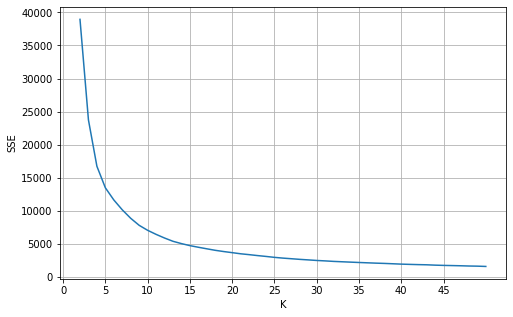

In [155]:
plt.figure(figsize=(8,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

<p>Dal plot selezioniamo K = 6.</p>

<p>Vediamo la silhouette.</p>

In [160]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
kmeans.fit(C)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(C, kmeans.labels_))

SSE 38948.344560800295
Silhouette 0.5289340412729034


<ul>
    <li> K=6 - Sil=0.348 - SSE=11636
    <li> K=5 - Sil=0.380 - SSE=13474
    <li> K=4 - Sil=0.414 - SSE=16728
    <li> K=3 - Sil=0.446 - SSE=23737
    <li> K=2 - Sil=0.528 - SSE=38948
</ul>
<p>We choose K=2</p>

### Run K-means

In [161]:
kmeans = KMeans(n_clusters=2, n_init=500, max_iter=100)
kmeans.fit(C)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [162]:
#Labels of each point
kmeans.labels_[:5]

array([0, 1, 0, 1, 1])

In [163]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([28041, 26428], dtype=int64))

In [164]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 28041, 1: 26428}

In [165]:
#Centers
kmeans.cluster_centers_

array([[ 0.7851254 ,  0.7710527 ],
       [-0.83310578, -0.81817307]])

In [166]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

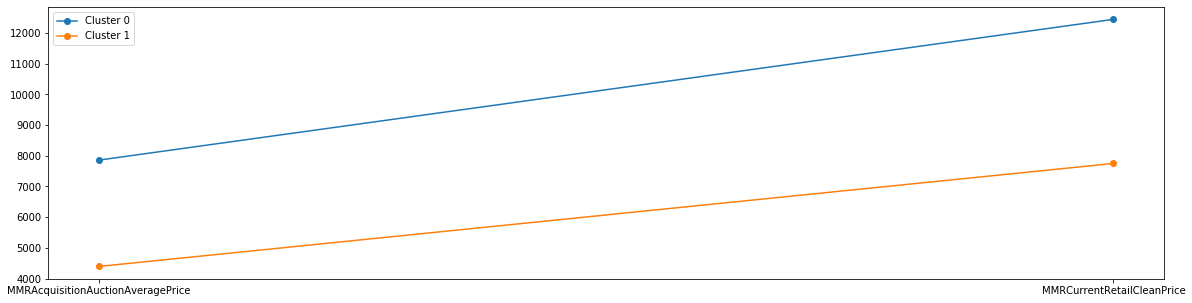

In [167]:
#Visualization of clusters centers by means of parallel coordinates
C = df[["MMRAcquisitionAuctionAveragePrice", "MMRCurrentRetailCleanPrice"]]

plt.figure(figsize=(20, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(C.columns)), C.columns)
plt.legend()
plt.show()

### Search in the clusters

In [168]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [169]:
mydict

{0: array([    0,     2,     5, ..., 54462, 54464, 54466], dtype=int64),
 1: array([    1,     3,     4, ..., 54465, 54467, 54468], dtype=int64)}

In [188]:
#df.iloc[mydict[0]]["Color"].value_counts()

In [189]:
#df.iloc[mydict[1]]["Color"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - nothing
    <li> Make - nothing
    <li> Size - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> Color - nothing
</ul>

# MMRAcquisitionAuctionAveragePrice - VehBCost-D

In [194]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(D)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

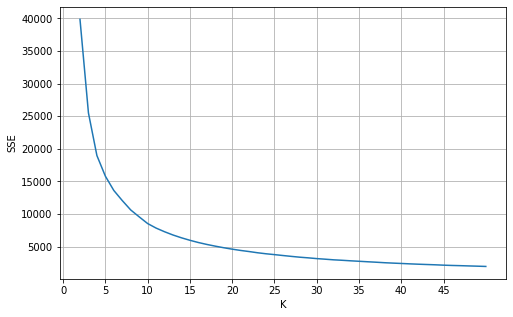

In [195]:
plt.figure(figsize=(8,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [173]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300)
kmeans.fit(D)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(D, kmeans.labels_))

SSE 10620.525903542708
Silhouette 0.34278944567586883


<ul>
    <li> K=2 - Sil=0.521 - SSE=39866
    <li> K=3 - Sil=0.429 - SSE=25505
    <li> K=4 - Sil=0.392 - SSE=18971
    <li> K=5 - Sil=0.354 - SSE=15807
    <li> K=6 - Sil=0.357 - SSE=13613
    <li> K=7 - Sil=0.360 - SSE=12061 
    <li> K=8 - Sil=0.342 - SSE=10621
</ul>

### Run K-means (K=7)

In [67]:
kmeans = KMeans(n_clusters=7, n_init=500, max_iter=100)
kmeans.fit(D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
#Labels of each point
kmeans.labels_[:5]

array([6, 4, 3, 4, 4])

In [69]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 9334,  3440,  6485, 10603, 12139,  4439,  8029], dtype=int64))

In [70]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 9334, 1: 3440, 2: 6485, 3: 10603, 4: 12139, 5: 4439, 6: 8029}

In [71]:
#Centers
kmeans.cluster_centers_

array([[ 3192.93543897,  4443.46739829],
       [ 8034.48839234,  9511.49782356],
       [ 6033.56621287,  7755.45010829],
       [ 8015.13590952,  7648.12950047],
       [ 4723.75683916,  5689.79218853],
       [10161.93447422,  9090.93219545],
       [ 6544.70729582,  6387.93283118]])

In [72]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


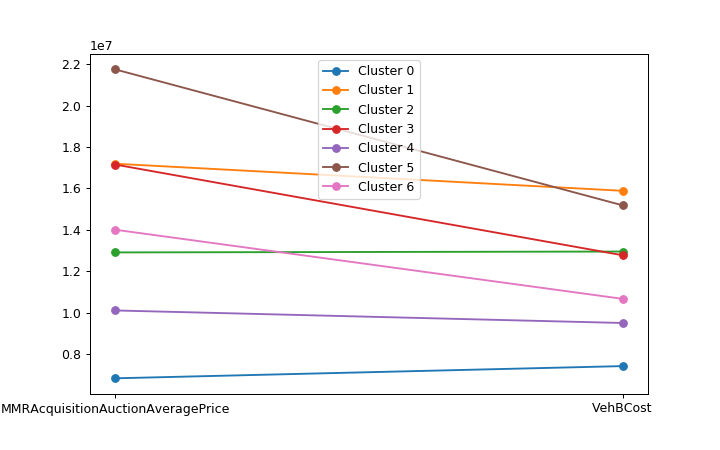

In [73]:
#Visualization of clusters centers by means of parallel coordinates
D = df[["MMRAcquisitionAuctionAveragePrice","VehBCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(D.columns)), D.columns)
plt.legend()
plt.show()

### Search in the clusters

In [74]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [121]:
#df.iloc[mydict[0]]["Transmission"].value_counts()

In [122]:
#df.iloc[mydict[1]]["Transmission"].value_counts()

In [123]:
#df.iloc[mydict[2]]["Transmission"].value_counts()

In [124]:
#df.iloc[mydict[3]]["Transmission"].value_counts()

In [125]:
#df.iloc[mydict[4]]["Transmission"].value_counts()

In [126]:
#df.iloc[mydict[5]]["Transmission"].value_counts()

In [127]:
#df.iloc[mydict[6]]["Transmission"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - in Cluster[0] no OTHER
    <li> VehicleAge - nothing
    <li> Make - nothing
    <li> Size - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> Color - nothing
</ul>

### Run K-means (K=5)

In [265]:
kmeans = KMeans(n_clusters=5, n_init=500, max_iter=100)
kmeans.fit(D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [266]:
#Labels of each point
kmeans.labels_[:5]

array([4, 1, 0, 2, 2])

In [267]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([12712,  9436, 13091,  5980, 13250], dtype=int64))

In [268]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 12712, 1: 9436, 2: 13091, 3: 5980, 4: 13250}

In [269]:
#Centers
kmeans.cluster_centers_

array([[ 0.83057043,  0.71685753],
       [-1.36486378, -1.39469111],
       [-0.63694527, -0.60845998],
       [ 1.58035609,  1.64933397],
       [ 0.09078984,  0.16190238]])

In [270]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

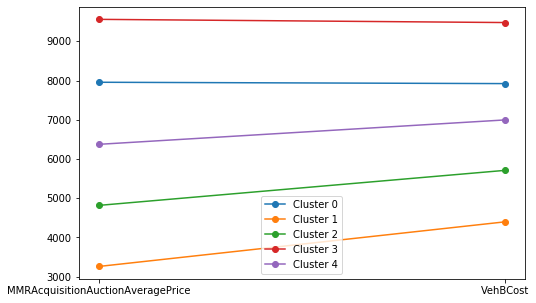

In [271]:
#Visualization of clusters centers by means of parallel coordinates
D = df[["MMRAcquisitionAuctionAveragePrice","VehBCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(D.columns)), D.columns)
plt.legend()
plt.show()

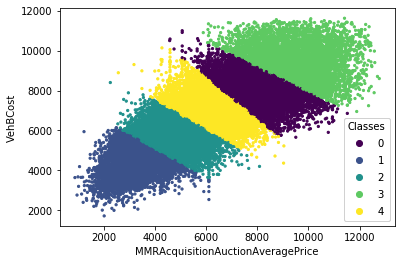

In [281]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["VehBCost"], c=kmeans.labels_, s=5)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

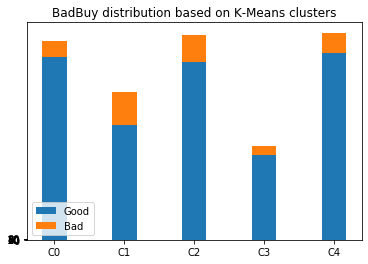

In [280]:
N = 5
goodMeans = (11682, 7371, 11366, 5452, 11970)
badMeans = (1030, 2065, 1725, 528, 1280)
goodStd = (0, 0, 0, 0, 0)
badStd = (0, 0, 0, 0, 0)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, goodMeans, width, yerr=goodStd)
p2 = plt.bar(ind, badMeans, width,
             bottom=goodMeans, yerr=badStd)

plt.title('BadBuy distribution based on K-Means clusters')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3', 'C4'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Good', 'Bad'))

plt.show()

In [273]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [274]:
df.iloc[mydict[0]]["IsBadBuy"].value_counts()

0    11682
1     1030
Name: IsBadBuy, dtype: int64

In [275]:
df.iloc[mydict[1]]["IsBadBuy"].value_counts()

0    7371
1    2065
Name: IsBadBuy, dtype: int64

In [276]:
df.iloc[mydict[2]]["IsBadBuy"].value_counts()

0    11366
1     1725
Name: IsBadBuy, dtype: int64

In [277]:
df.iloc[mydict[3]]["IsBadBuy"].value_counts()

0    5452
1     528
Name: IsBadBuy, dtype: int64

In [278]:
df.iloc[mydict[4]]["IsBadBuy"].value_counts()

0    11970
1     1280
Name: IsBadBuy, dtype: int64

### Run K-means (K=4)

In [194]:
kmeans = KMeans(n_clusters=4, n_init=500, max_iter=100)
kmeans.fit(D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [195]:
#Labels of each point
kmeans.labels_[:5]

array([2, 2, 3, 0, 2])

In [181]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([15321, 18472, 12099,  8577], dtype=int64))

In [182]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 15321, 1: 18472, 2: 12099, 3: 8577}

In [183]:
#Centers
kmeans.cluster_centers_

array([[-0.41029772, -0.395715  ],
       [ 0.4988558 ,  0.49471539],
       [-1.27812285, -1.27897492],
       [ 1.46068334,  1.44480681]])

In [184]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


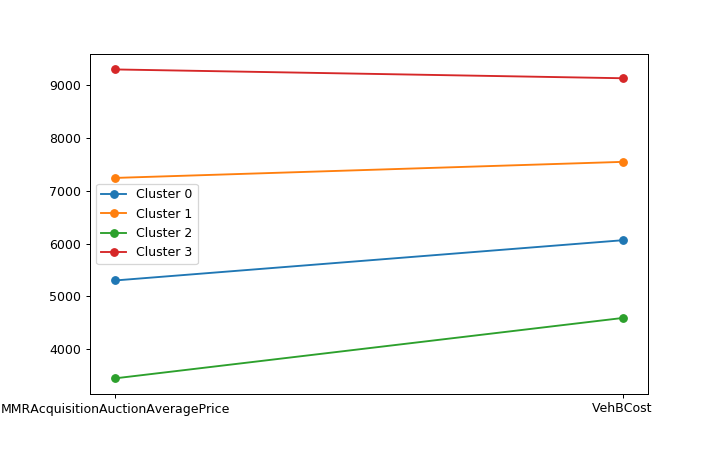

In [185]:
#Visualization of clusters centers by means of parallel coordinates
D = df[["MMRAcquisitionAuctionAveragePrice","VehBCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(D.columns)), D.columns)
plt.legend()
plt.show()

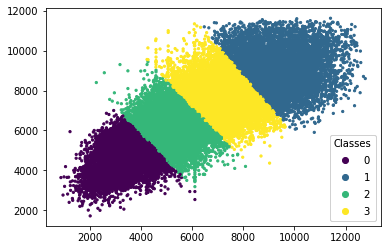

In [229]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["VehBCost"], c=kmeans.labels_, s=5)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

<p>Come possiamo vedere dal bar plot, il cluster con il maggior numero di bad buy è il cluster 0 (viola)</p>

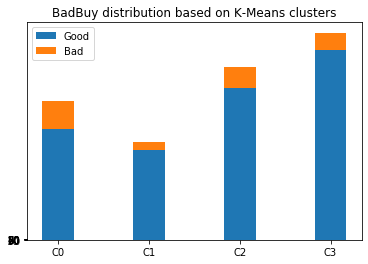

In [232]:
N = 4
goodMeans = (9772, 7916, 13408, 16745)
badMeans = (2500, 724, 1854, 1550)
goodStd = (0, 0, 0, 0)
badStd = (0, 0, 0, 0)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, goodMeans, width, yerr=goodStd)
p2 = plt.bar(ind, badMeans, width,
             bottom=goodMeans, yerr=badStd)

plt.title('BadBuy distribution based on K-Means clusters')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3', 'C4'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Good', 'Bad'))

plt.show()

### Search in the clusters

In [199]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [259]:
#df.iloc[mydict[0]]["IsBadBuy"].value_counts()

In [260]:
#df.iloc[mydict[1]]["IsBadBuy"].value_counts()

In [261]:
#df.iloc[mydict[2]]["IsBadBuy"].value_counts()

In [262]:
#df.iloc[mydict[3]]["IsBadBuy"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - Cluster4 no age=1
    <li> Make - nothing
    <li> Size - nei primi due cluster ci sono macchine più grandi
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> BodyStyle - nothing
</ul>

### Run K-means (K=3)

In [233]:
kmeans = KMeans(n_clusters=3, n_init=500, max_iter=100)
kmeans.fit(D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [234]:
#Labels of each point
kmeans.labels_[:5]

array([0, 2, 1, 2, 0])

In [235]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([21294, 14281, 18894], dtype=int64))

In [236]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 21294, 1: 14281, 2: 18894}

In [237]:
#Centers
kmeans.cluster_centers_

array([[6426.33183394, 6979.02778559],
       [8837.31439792, 8624.50756575],
       [3890.82790969, 5001.33827115]])

In [238]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

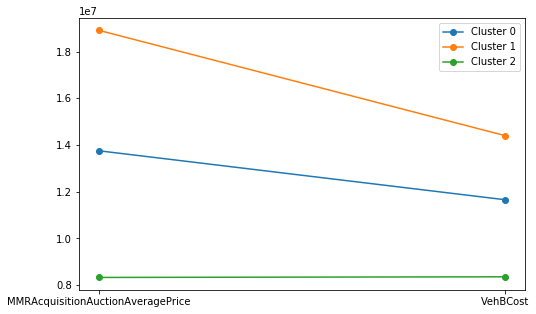

In [239]:
#Visualization of clusters centers by means of parallel coordinates
D = df[["MMRAcquisitionAuctionAveragePrice","VehBCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(D.columns)), D.columns)
plt.legend()
plt.show()

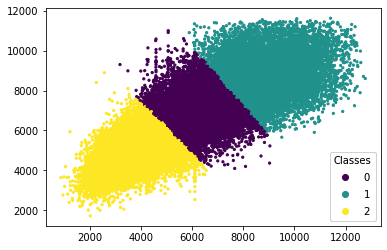

In [240]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["VehBCost"], c=kmeans.labels_, s=5)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

<p>Come possiamo vedere dar bar plot, il cluster con il maggior numero di bad buy è il numero 2 (giallo).</p>

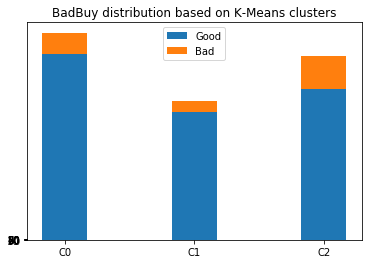

In [245]:
N = 3
goodMeans = (19154, 13147, 15540)
badMeans = (2140, 1134, 3354)
goodStd = (0, 0, 0)
badStd = (0, 0, 0)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, goodMeans, width, yerr=goodStd)
p2 = plt.bar(ind, badMeans, width,
             bottom=goodMeans, yerr=badStd)

plt.title('BadBuy distribution based on K-Means clusters')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Good', 'Bad'))

plt.show()

### Search in the clusters

In [241]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [246]:
#df.iloc[mydict[0]]["IsBadBuy"].value_counts()

In [247]:
#df.iloc[mydict[1]]["IsBadBuy"].value_counts()

In [248]:
#df.iloc[mydict[2]]["IsBadBuy"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - nothing
    <li> Make - nothing
    <li> Size - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> Color - nothing
</ul>

### Run K-means (K=2)

In [38]:
kmeans = KMeans(n_clusters=2, n_init=500, max_iter=100)
kmeans.fit(D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
#Labels of each point
kmeans.labels_[:5]

array([0, 0, 1, 0, 0])

In [40]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([25972, 28497], dtype=int64))

In [28]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 25972, 1: 28497}

In [41]:
#Centers
kmeans.cluster_centers_

array([[-0.83765092, -0.83030819],
       [ 0.76359874,  0.75690514]])

In [42]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


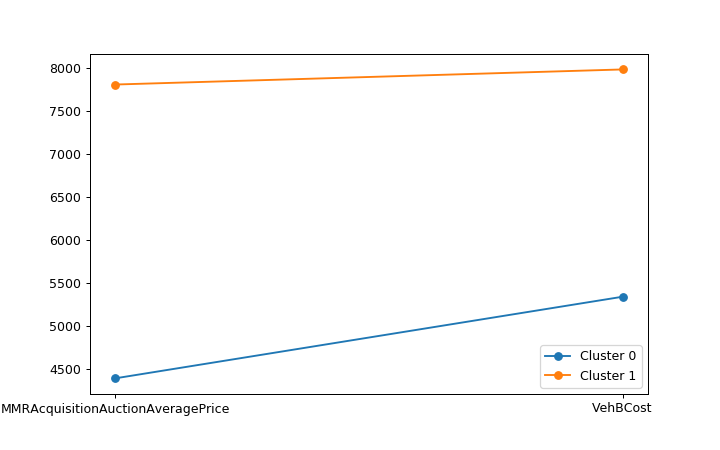

In [43]:
#Visualization of clusters centers by means of parallel coordinates
D = df[["MMRAcquisitionAuctionAveragePrice","VehBCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(D.columns)), D.columns)
plt.legend()
plt.show()

### Search in the clusters

In [44]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [63]:
#df.iloc[mydict[0]]["Color"].value_counts()

In [64]:
#df.iloc[mydict[1]]["Color"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - nothing
    <li> Make - nothing
    <li> Size - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> Color - nothing
</ul>

# MMRAcquisitionAuctionAveragePrice - WarrantyCost-E

In [28]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(E)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

<IPython.core.display.Javascript object>


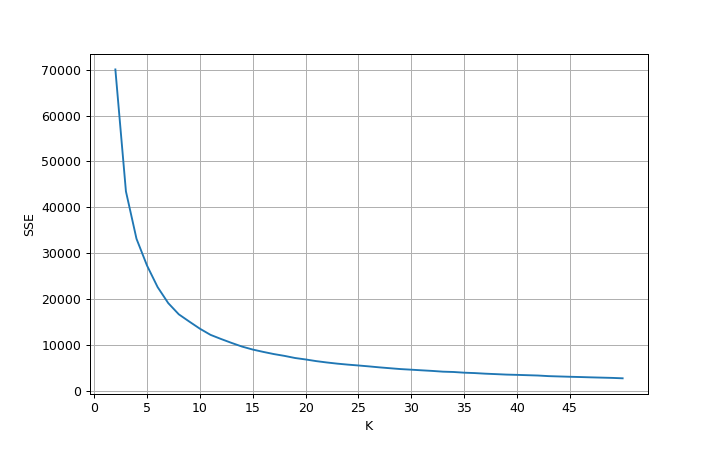

In [29]:
plt.figure(figsize=(8,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [36]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300)
kmeans.fit(E)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(E, kmeans.labels_))

SSE 16686.86351577262
Silhouette 0.34601558647737707


<ul>
    <li> K=8 - SSE=16686 - Sil=0.346
    <li> K=7 - SSE=19130 - Sil=0.359
    <li> K=6 - SSE=22606 - Sil=0.3576
    <li> K=5 - SSE=27282 - Sil=0.0.341
    <li> K=4 - SSE=33139 - Sil=0.364
    <li> K=3 - SSE=43472 - Sil=0.377
    <li> K=2 - SSE=70041 - Sil=0.35
</ul>

### Run K-means (K=4)

In [38]:
kmeans = KMeans(n_clusters=4, n_init=500, max_iter=100)
kmeans.fit(E)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
#Labels of each point
kmeans.labels_[:5]

array([0, 1, 0, 1, 1])

In [52]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([15671,  9080, 11931, 17787], dtype=int64))

In [53]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 15671, 1: 9080, 2: 11931, 3: 17787}

In [54]:
#Centers
kmeans.cluster_centers_

array([[ 0.81611816, -0.64486736],
       [-0.93671353,  1.0664554 ],
       [ 0.82041119,  1.0484543 ],
       [-0.79297063, -0.67982057]])

In [57]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


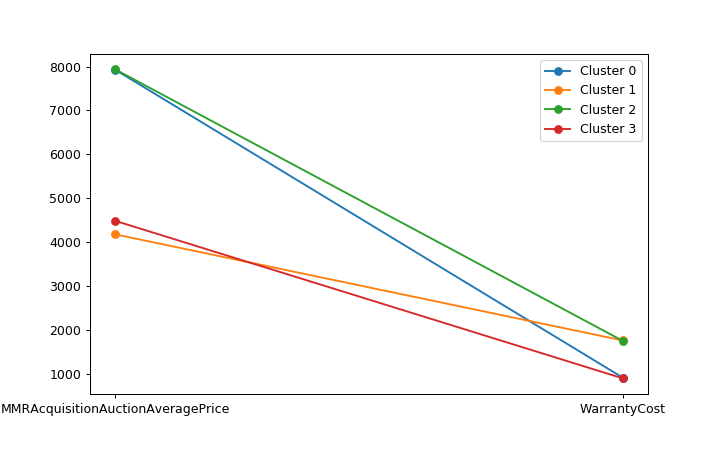

In [58]:
#Visualization of clusters centers by means of parallel coordinates
E = df[["MMRAcquisitionAuctionAveragePrice", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(E.columns)), E.columns)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


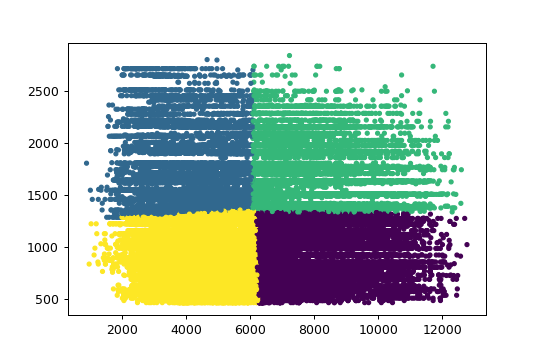

In [61]:
plt.scatter(df['MMRAcquisitionAuctionAveragePrice'], df['WarrantyCost'], c=kmeans.labels_, s=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

### Search in the clusters

In [67]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [96]:
#df.iloc[mydict[0]]["WheelTypeID"].value_counts()

In [97]:
#df.iloc[mydict[1]]["WheelTypeID"].value_counts()

In [98]:
#df.iloc[mydict[2]]["WheelTypeID"].value_counts()

In [99]:
#df.iloc[mydict[3]]["WheelTypeID"].value_counts()

<ul>
    <li> IsBadBuy - nothing
    <li> Nationality - nothing
    <li> VehicleAge - Cluster 0 no macchine di 1 anno
    <li> Make - nothing
    <li> Size - nothing
    <li> WheelTypeID - nothing
    <li> Transmission - nothing
    <li> VNST - nothing
    <li> BodyStyle - nothing
</ul>

### Run K-means (K=3)

In [329]:
kmeans = KMeans(n_clusters=3, n_init=500, max_iter=100)
kmeans.fit(E)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [330]:
#Labels of each point
kmeans.labels_[:5]

array([2, 0, 2, 0, 0])

In [331]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([14306, 21645, 18518], dtype=int64))

In [332]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 14306, 1: 21645, 2: 18518}

In [333]:
#Centers
kmeans.cluster_centers_

array([[-0.04275033,  1.33183838],
       [-0.79417012, -0.54397481],
       [ 0.9616552 , -0.39402223]])

In [334]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

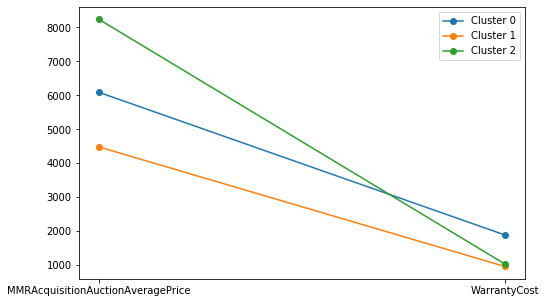

In [335]:
#Visualization of clusters centers by means of parallel coordinates
E = df[["MMRAcquisitionAuctionAveragePrice", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(E.columns)), E.columns)
plt.legend()
plt.show()

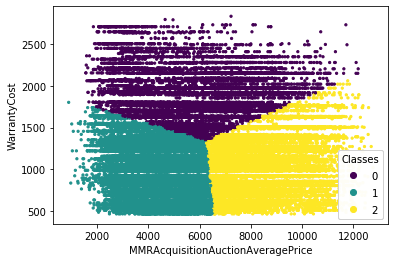

In [336]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["WarrantyCost"], c=kmeans.labels_, s=5)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('WarrantyCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

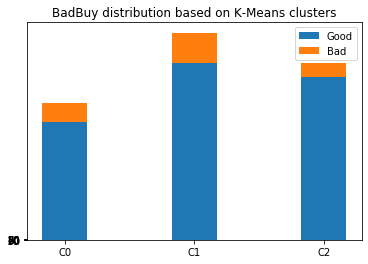

In [345]:
N = 3
goodMeans = (12319, 18507, 17015)
badMeans = (1987, 3138, 1503)
goodStd = (0, 0, 0)
badStd = (0, 0, 0)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, goodMeans, width, yerr=goodStd)
p2 = plt.bar(ind, badMeans, width,
             bottom=goodMeans, yerr=badStd)

plt.title('BadBuy distribution based on K-Means clusters')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Good', 'Bad'))

plt.show()

In [338]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [342]:
#df.iloc[mydict[0]]["IsBadBuy"].value_counts()

In [343]:
#df.iloc[mydict[1]]["IsBadBuy"].value_counts()

In [344]:
#df.iloc[mydict[2]]["IsBadBuy"].value_counts()

### Search in the clusters

In [314]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [316]:
df.iloc[mydict[0]]["IsBadBuy"].value_counts()

0    18525
1     3138
Name: IsBadBuy, dtype: int64

In [317]:
df.iloc[mydict[1]]["IsBadBuy"].value_counts()

0    12298
1     1986
Name: IsBadBuy, dtype: int64

In [318]:
df.iloc[mydict[2]]["IsBadBuy"].value_counts()

0    17018
1     1504
Name: IsBadBuy, dtype: int64

# VehBCost - WarrantyCost - F

In [164]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(F)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

<IPython.core.display.Javascript object>


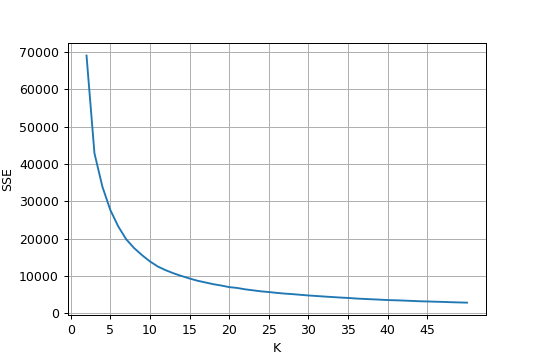

In [168]:
plt.figure(figsize=(6,4))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [94]:
kmeans = KMeans(n_clusters=4, n_init=500, max_iter=100)
kmeans.fit(F)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(F, kmeans.labels_))

SSE 33889.56297953739
Silhouette 0.358088636028097


<ul>
    <li> K=7 - SSE=19857 - Sil=0.347
    <li> K=6 - SSE=23284 - Sil=0.344
    <li> K=5 - SSE=27685 - Sil=0.341
    <li> K=4 - SSE=33889 - Sil=0.358
    <li> K=3 - SSE=42857 - Sil=0.3852
</ul>

### Run K-means (K=4)

In [284]:
kmeans = KMeans(n_clusters=4, n_init=500, max_iter=100)
kmeans.fit(F)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [285]:
#Labels of each point
kmeans.labels_[:5]

array([3, 2, 1, 2, 2])

In [286]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([12121, 15418,  8778, 18152], dtype=int64))

In [287]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 12121, 1: 15418, 2: 8778, 3: 18152}

In [288]:
#Centers
kmeans.cluster_centers_

array([[ 0.78380426,  1.03138238],
       [ 0.83355811, -0.63664009],
       [-0.90722127,  1.10273726],
       [-0.79404201, -0.68052699]])

In [289]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

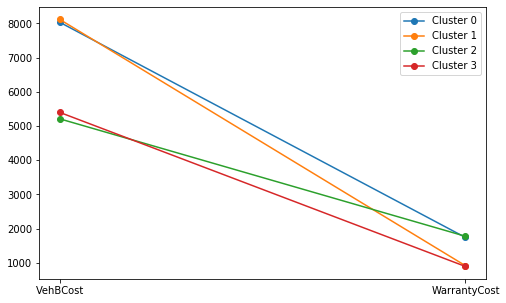

In [290]:
#Visualization of clusters centers by means of parallel coordinates
F = df[["VehBCost", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(F.columns)), F.columns)
plt.legend()
plt.show()

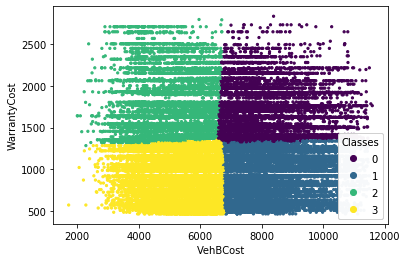

In [291]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["VehBCost"], df["WarrantyCost"], c=kmeans.labels_, s=5)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

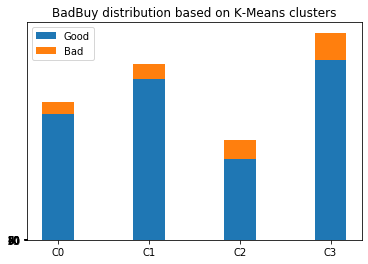

In [298]:
N = 4
goodMeans = (10986, 14057, 7065, 15733)
badMeans = (1135, 1361, 1713, 2419)
goodStd = (0, 0, 0, 0)
badStd = (0, 0, 0, 0)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, goodMeans, width, yerr=goodStd)
p2 = plt.bar(ind, badMeans, width,
             bottom=goodMeans, yerr=badStd)

plt.title('BadBuy distribution based on K-Means clusters')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Good', 'Bad'))

plt.show()

In [292]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [299]:
#df.iloc[mydict[0]]["IsBadBuy"].value_counts()

In [300]:
#df.iloc[mydict[1]]["IsBadBuy"].value_counts()

In [301]:
#df.iloc[mydict[2]]["IsBadBuy"].value_counts()

In [302]:
#df.iloc[mydict[3]]["IsBadBuy"].value_counts()

# MMRAcquisitionAuctionAveragePrice - VehBCost - WarrantyCost - G

In [20]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(G)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


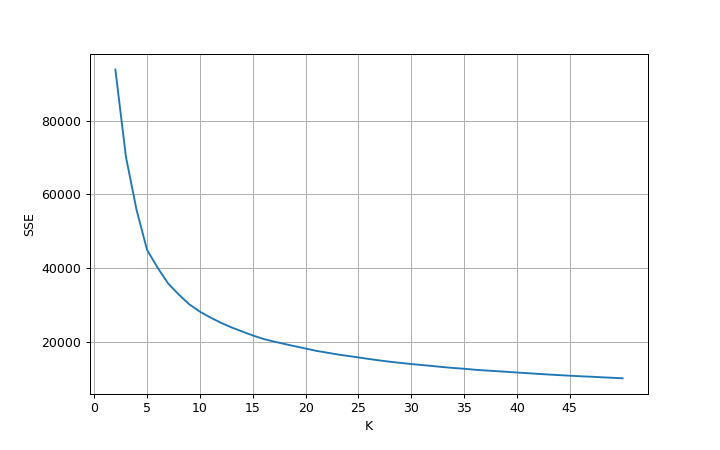

In [162]:
plt.figure(figsize=(8,5))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [115]:
kmeans = KMeans(n_clusters=6, n_init=500, max_iter=100)
kmeans.fit(G)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(G, kmeans.labels_))

SSE 40083.95961305924
Silhouette 0.2878940597553725


<ul>
    <li> K=6 - SSE=40083 - Sil=0.287
    <li> K=5 - SSE=44920 - Sil=0.314
    <li> K=4 - SSE=55837 - Sil=0.315
    <li> K=3 - SSE=70182 - Sil=0.354
    <li> K=2 - SSE=93899 - Sil=0.367
</ul>

### Run K-means (K=5)

In [136]:
kmeans = KMeans(n_clusters=5, n_init=500, max_iter=100)
kmeans.fit(G)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
#Labels of each point
kmeans.labels_[:5]

array([0, 3, 0, 3, 3])

In [138]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([14680,  8743,  9947,  7658, 13441], dtype=int64))

In [139]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 14680, 1: 8743, 2: 9947, 3: 7658, 4: 13441}

In [140]:
#Centers
kmeans.cluster_centers_

array([[ 0.2285147 ,  0.22738747, -0.64108911],
       [ 1.39034197,  1.38935583, -0.21687746],
       [ 0.53604664,  0.51851133,  1.2411346 ],
       [-1.02932457, -0.98038368,  1.07152517],
       [-0.96343773, -0.97647401, -0.68712699]])

In [141]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


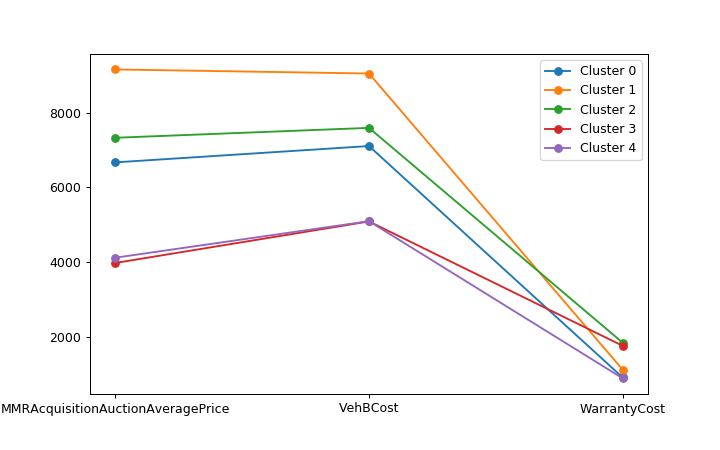

In [142]:
#Visualization of clusters centers by means of parallel coordinates
G = df[["MMRAcquisitionAuctionAveragePrice", "VehBCost", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(G.columns)), G.columns)
plt.legend()
plt.show()

### Run K-means (K=4)

In [536]:
kmeans = KMeans(n_clusters=4, n_init=500, max_iter=100)
kmeans.fit(G)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [537]:
#Labels of each point
kmeans.labels_[:5]

array([0, 3, 1, 3, 3])

In [538]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([18050, 16104, 11668,  8647], dtype=int64))

In [539]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 18050, 1: 16104, 2: 11668, 3: 8647}

In [540]:
#Centers
kmeans.cluster_centers_

array([[-0.64329472, -0.66399189, -0.71393245],
       [ 0.91737321,  0.9231887 , -0.52497356],
       [ 0.56348904,  0.55768257,  1.15583457],
       [-1.12650133, -1.08619323,  0.90961009]])

In [541]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

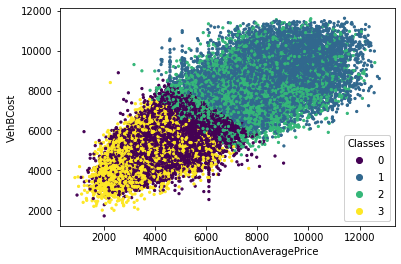

In [542]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["VehBCost"], c=kmeans.labels_, s=5)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

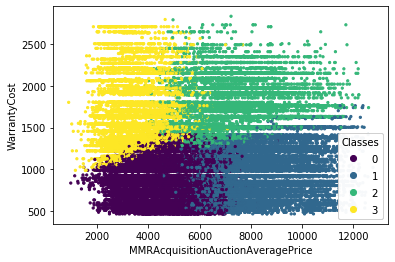

In [543]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["WarrantyCost"], c=kmeans.labels_, s=5)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('WarrantyCost')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()

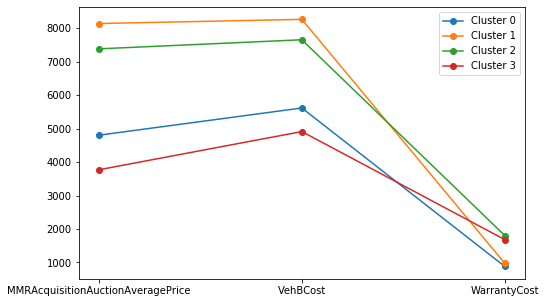

In [544]:
#Visualization of clusters centers by means of parallel coordinates
G = df[["MMRAcquisitionAuctionAveragePrice", "VehBCost", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(G.columns)), G.columns)
plt.legend()
plt.show()

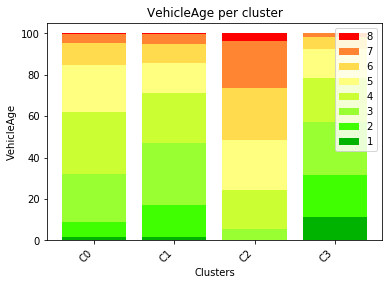

In [445]:
clusters = ['C0','C1','C2','C3']

age1 = np.array([288, 193, 0, 1852])
age2 = np.array([1275, 1817, 20, 3253])
age3 = np.array([4185, 3492, 465, 4089])
age4 = np.array([5470, 2814, 1638, 3440])
age5 = np.array([4025, 1691, 2084, 2227])
age6 = np.array([1928, 1069, 2177, 977])
age7 = np.array([765, 557, 1965, 240])
age8 = np.array([96, 34, 331, 12])

ind = [x for x, _ in enumerate(clusters)]

total = age1 + age2 + age3 + age4 + age5 + age6 + age7 + age8
prop_age1 = np.true_divide(age1, total) * 100
prop_age2 = np.true_divide(age2, total) * 100
prop_age3 = np.true_divide(age3, total) * 100
prop_age4 = np.true_divide(age4, total) * 100
prop_age5 = np.true_divide(age5, total) * 100
prop_age6 = np.true_divide(age6, total) * 100
prop_age7 = np.true_divide(age7, total) * 100
prop_age8 = np.true_divide(age8, total) * 100

plt.bar(ind, prop_age8, width=0.8, label='8', color='#ff0000', bottom=prop_age1+prop_age2+prop_age3+prop_age4+prop_age5+prop_age6+prop_age7)
plt.bar(ind, prop_age7, width=0.8, label='7', color='#ff8533', bottom=prop_age1+prop_age2+prop_age3+prop_age4+prop_age5+prop_age6)
plt.bar(ind, prop_age6, width=0.8, label='6', color='#ffdb4d', bottom=prop_age1+prop_age2+prop_age3+prop_age4+prop_age5)
plt.bar(ind, prop_age5, width=0.8, label='5', color='#ffff80', bottom=prop_age1+prop_age2+prop_age3+prop_age4)
plt.bar(ind, prop_age4, width=0.8, label='4', color='#ccff33', bottom=prop_age1+prop_age2+prop_age3)
plt.bar(ind, prop_age3, width=0.8, label='3', color='#99ff33', bottom=prop_age1+prop_age2)
plt.bar(ind, prop_age2, width=0.8, label='2', color='#40ff00', bottom=prop_age1)
plt.bar(ind, prop_age1, width=0.8, label='1', color='#00b300')


plt.xticks(ind, clusters)
plt.ylabel("VehicleAge")
plt.xlabel("Clusters")
plt.legend(loc="upper right")
plt.title("VehicleAge per cluster")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

<p>VehicleAge</p>
<ul>
    <li>C0: more 4 (40,9% of 4)
    <li>C1: more 3
    <li>C2: most old car (70% of 8)(57,4% more than 6)
    <li>C3: most young car (79,4% of 1)(58,7% less than 2)
</ul>

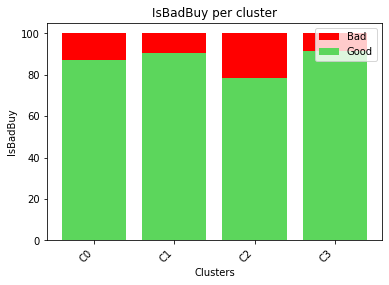

In [448]:
clusters = ['C0','C1','C2','C3']

bad = np.array([2297, 1094, 1882, 1355])
good = np.array([15735, 10573, 6798, 14735])

ind = [x for x, _ in enumerate(clusters)]

total = bad+good
prop_bad = np.true_divide(bad, total) * 100
prop_good = np.true_divide(good, total) * 100

plt.bar(ind, prop_bad, width=0.8, label='Bad', color='#ff0000', bottom=prop_good)
plt.bar(ind, prop_good, width=0.8, label='Good', color='#5cd65c')

plt.xticks(ind, clusters)
plt.ylabel("IsBadBuy")
plt.xlabel("Clusters")
plt.legend(loc="upper right")
plt.title("IsBadBuy per cluster")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

<p>IsBadBuy</p>
<ul>
    <li>C0: 
    <li>C1: 
    <li>C2: 21,7% bad rate 
    <li>C3: 8,4% bad rate
</ul>

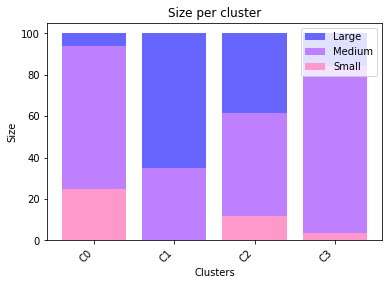

In [511]:
clusters = ['C0','C1','C2','C3']

small = np.array([4457, 30, 1009, 552])
medium = np.array([12427, 4037, 4330, 13031])
large = np.array([1148, 7600, 3341, 2507])

ind = [x for x, _ in enumerate(clusters)]

total = small+medium+large
prop_small = np.true_divide(small, total) * 100
prop_medium = np.true_divide(medium, total) * 100
prop_large = np.true_divide(large, total) * 100

plt.bar(ind, prop_large, width=0.8, label='Large', color='#6666ff', bottom=prop_small+prop_medium)
plt.bar(ind, prop_medium, width=0.8, label='Medium', color='#bf80ff', bottom=prop_small)
plt.bar(ind, prop_small, width=0.8, label='Small', color='#ff99cc')

plt.xticks(ind, clusters)
plt.ylabel("Size")
plt.xlabel("Clusters")
plt.legend(loc="upper right")
plt.title("Size per cluster")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

<p>Size</p>
<ul>
    <li>C0: more SMALL (73,7%)
    <li>C1: more LARGE (52,1%)
    <li>C2:
    <li>C3: more MEDIUM (38,5%)
</ul>

In [401]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [602]:
df.iloc[mydict[0]]["IsBadBuy"].value_counts()

0    15778
1     2254
Name: IsBadBuy, dtype: int64

In [603]:
df.iloc[mydict[1]]["IsBadBuy"].value_counts()

0    10255
1     1412
Name: IsBadBuy, dtype: int64

In [604]:
df.iloc[mydict[2]]["IsBadBuy"].value_counts()

0    7608
1    1072
Name: IsBadBuy, dtype: int64

In [605]:
df.iloc[mydict[3]]["IsBadBuy"].value_counts()

0    14085
1     2005
Name: IsBadBuy, dtype: int64

### Run K-means (K=3)

In [373]:
kmeans = KMeans(n_clusters=3, n_init=500, max_iter=100)
kmeans.fit(G)

KeyboardInterrupt: 

In [158]:
#Labels of each point
kmeans.labels_[:5]

array([2, 2, 0, 2, 1])

In [159]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([20402, 12311, 21756], dtype=int64))

In [160]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 20402, 1: 12311, 2: 21756}

In [161]:
#Centers
kmeans.cluster_centers_

array([[ 0.8667366 ,  0.86592092, -0.38224562],
       [ 0.0549692 ,  0.09191043,  1.38602918],
       [-0.84575579, -0.86592214, -0.42614601]])

In [162]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


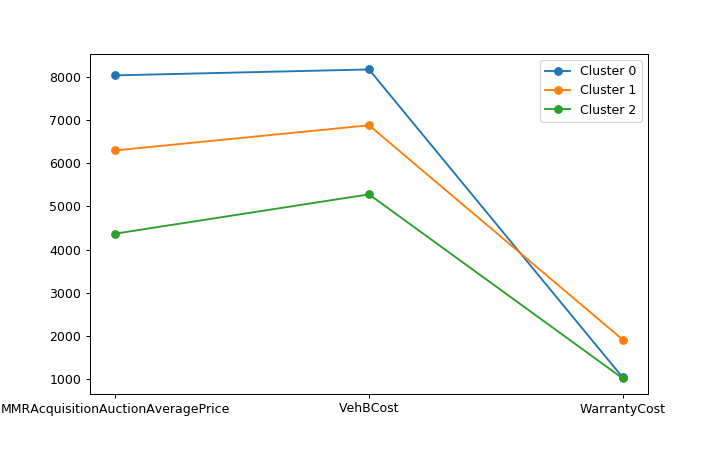

In [163]:
#Visualization of clusters centers by means of parallel coordinates
G = df[["MMRAcquisitionAuctionAveragePrice", "VehBCost", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(G.columns)), G.columns)
plt.legend()
plt.show()

### Run K-means (K=2)

In [164]:
kmeans = KMeans(n_clusters=2, n_init=500, max_iter=100)
kmeans.fit(G)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=500, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [165]:
#Labels of each point
kmeans.labels_[:5]

array([1, 0, 1, 0, 0])

In [166]:
#Size of each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([26015, 28454], dtype=int64))

In [167]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 26015, 1: 28454}

In [168]:
#Centers
kmeans.cluster_centers_

array([[4360.47837786, 5371.26905631, 1195.59450317],
       [7842.00238982, 7962.14769031, 1266.31612427]])

In [169]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

<IPython.core.display.Javascript object>


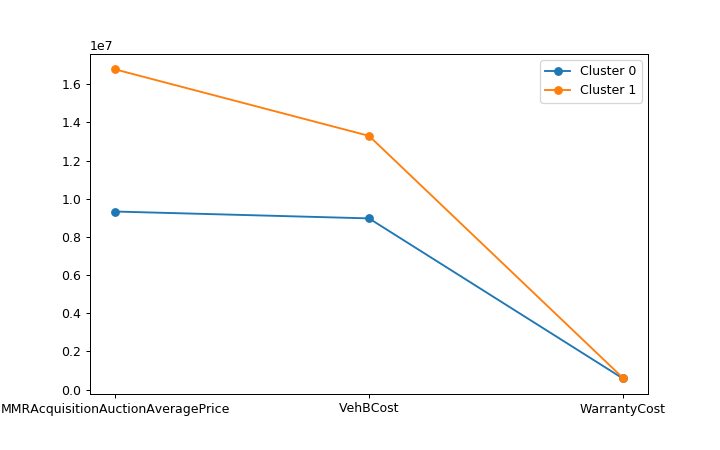

In [170]:
#Visualization of clusters centers by means of parallel coordinates
G = df[["MMRAcquisitionAuctionAveragePrice", "VehBCost", "WarrantyCost"]]

plt.figure(figsize=(8, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(G.columns)), G.columns)
plt.legend()
plt.show()

# Relazione finale sul K-Means

<p>Come funzione di distanza, è stata scelta quella euclidea. Per identificare il numero ottimale di cluster (k) si è osservata la distribuzione di SSE generata iterativamente per ogni valore di k da 2 a 50 applivando lo 'knee method' e confrontando le silhouette dei più 'papabili' k.</p>

<p>Interessante analisi MMRAAAP e VehBCost (k=4 o k=3)</p>
<p>Interessante analisi WarrantyCost e VehBCost (k=4)</p>
<p>Interessante analisi MMRAAAP e WarrantyCost (k=3)</p>
<p>Facciamo tutte per k=3 o K=4</p>